In [1]:
# 557037795497527

700 300
最优适应度值： [0.01884689]
最优解： [[ 0.01580596  0.01570629  0.01431867  0.01396826  0.01819674  0.03296924
   0.00950697  0.04963541 -0.0189935   0.02346186  0.03747166  0.016304
   0.02185608  0.01204917  0.0243013  -0.00720545  0.01659718  0.02984806
   0.02388585  0.02222903  0.01629987 -0.00466699  0.05747927  0.02399097
  -0.00564614  0.00910623  0.04094361  0.02280781  0.00210449  0.03765431]]


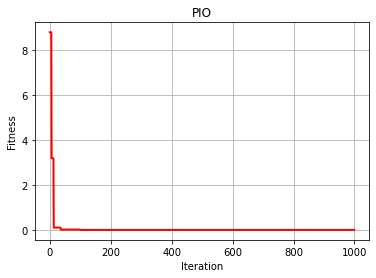

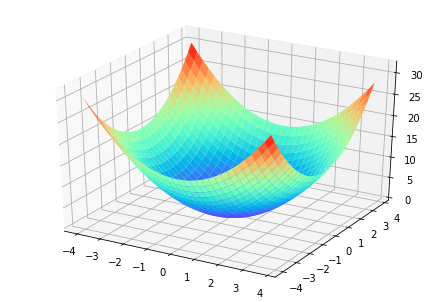

In [21]:
import numpy as np
import random
import math
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


'''优化函数'''


# y = x^2, 用户可以自己定义其他函数
def fun(x):
    output = sum(np.square(x))
    return output
#     sum = 0
#     length = 5
#     for i in range(length):
#         sum += (4*x[i]**3-5*x[i]**2+x[i]+6)**2
#     return sum


''' 种群初始化函数 '''


def initial(pop, dim, ub, lb):
    X = np.zeros([pop, dim])
    for i in range(pop):
        for j in range(dim):
            X[i, j] = random.random() * (ub[j] - lb[j]) + lb[j]

    return X, lb, ub


'''边界检查函数'''


def BorderCheck(X, ub, lb, pop, dim):
    for i in range(pop):
        for j in range(dim):
            if X[i, j] > ub[j]:
                X[i, j] = ub[j]
            elif X[i, j] < lb[j]:
                X[i, j] = lb[j]
    return X


'''计算适应度函数'''


def CaculateFitness(X, fun):
    pop = X.shape[0]
    fitness = np.zeros([pop, 1])
    for i in range(pop):
        fitness[i] = fun(X[i, :])
    return fitness


'''适应度排序'''


def SortFitness(Fit):
    fitness = np.sort(Fit, axis=0)
    index = np.argsort(Fit, axis=0)
    return fitness, index


'''根据适应度对位置进行排序'''


def SortPosition(X, index):
    Xnew = np.zeros(X.shape)
    for i in range(X.shape[0]):
        Xnew[i, :] = X[index[i], :]
    return Xnew



'''鸽群算法'''


def PIO(pop, dim, lb, ub, Max_iter, fun):
    
    Nc1= round(Max_iter*0.7) #地图因子
    Nc2= Max_iter - Nc1 #指南因子
    
    X, lb, ub = initial(pop, dim, ub, lb)  # 初始化种群
    Vec = np.random.random([pop,dim]) #初始速度
   
    fitness = CaculateFitness(X, fun)  # 计算适应度值
    fitness, sortIndex = SortFitness(fitness)  # 对适应度值排序
    X = SortPosition(X, sortIndex)  # 种群排序
    GbestScore = fitness[0]
    GbestPositon = np.zeros([1,dim])
    GbestPositon[0,:] = X[0, :]
    Curve = np.zeros([MaxIter, 1])
    
    X_new = X
    VecNew = Vec
    #地图更新
    for t in range(Nc1):     
        Vec = VecNew
        for i in range(pop):
            R = random.random()
            #速度更新
            TempV = Vec[i,:] + random.random()*(GbestPositon[0,:] - X[i,:])
            #位置更新
            TempPosition = X[i,:]*(1-np.exp(-R*t)) + TempV
            #边界检查
            for j in range(dim):
                if TempPosition[j]<lb[j] or TempPosition[j]>ub[j]:
                    TempPosition[j] = lb[j] + random.random()*(ub[j] - lb[j])
                    TempV[j] = random.random()
            X_new[i,:] = TempPosition
            VecNew[i,:] = TempV
        
        X = X_new
        fitness = CaculateFitness(X, fun)  # 计算适应度值
        fitness, sortIndex = SortFitness(fitness)  # 对适应度值排序
        X = SortPosition(X, sortIndex)  # 种群排序
        if fitness[0] <= GbestScore:  # 更新全局最优
            GbestScore = fitness[0]
            GbestPositon[0,:] = X[0, :]
        Curve[t] = GbestScore
    
    for t in range(Nc2):
        # 根据地标舍去后50%，并计算中心
        S = 0
        half = int(np.round(pop/2))
        for i in range(half):
            S = S + X[i,:]*fitness[i]
        
        Xcenter = S/(half*np.sum(fitness[1:half]))
        for i in range(half):
            for j in range(dim):
                Temp = X[i,j] + random.random()*(Xcenter[j] - X[i,j])
                while Temp<lb[j] or Temp>ub[j]:
                    Temp = X[i,j] + random.random()*(Xcenter[j] - X[i,j])
        
        fitness = CaculateFitness(X, fun)  # 计算适应度值
        fitness, sortIndex = SortFitness(fitness)  # 对适应度值排序
        X = SortPosition(X, sortIndex)  # 种群排序
        if fitness[0] <= GbestScore:  # 更新全局最优
            GbestScore = fitness[0]
            GbestPositon[0,:] = X[0, :]
        Curve[t + Nc1] = GbestScore
        

    return GbestScore, GbestPositon, Curve


'''主函数 '''
# 设置参数
pop = 50  # 种群数量
MaxIter = 1000  # 最大迭代次数
dim = 30  # 维度
lb = -50 * np.ones([dim, 1])  # 下边界
ub = 50 * np.ones([dim, 1])  # 上边界

GbestScore, GbestPositon, Curve = PIO(pop, dim, lb, ub, MaxIter, fun)
print('最优适应度值：', GbestScore)
print('最优解：', GbestPositon)

# 绘制适应度曲线
plt.figure(1)
plt.plot(Curve, 'r-', linewidth=2)
plt.xlabel('Iteration', fontsize='medium')
plt.ylabel("Fitness", fontsize='medium')
plt.grid()
plt.title('PIO', fontsize='large')

# 绘制搜索空间
fig = plt.figure(2)
ax = Axes3D(fig)
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)
Z = (X) ** 2 + (Y) ** 2
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='rainbow')
plt.show()
